In [1]:
%matplotlib inline
import os

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-muted')
plt.rc('ytick',labelsize=20)

# seaborn-muted

activations = [
    'ELU',
    'ReLU',
    'Softplus',
    'Softplus\n' + r'($\beta=20$)',
]

scores = {
    'CIFAR-10': {
        'Inception Score':{
            'GAN': [4.406, 6.87, 1.001, 2.228],
            'SN-GAN': [2.17, 7.42, 1.438, 6.109],
            'WGAN-GP': [2.09, 7.03, 2.383, 6.707],
            'GN-GAN': [6.50, 7.66, 1.558, 6.574],
        },
        'FID': {
            'GAN': [106.4, 38.4, 401.3, 194.4],
            'SN-GAN': [187.1, 23.71, 395.7, 47.75],
            'WGAN-GP': [229.3, 30.45, 273.3, 41.95],
            'GN-GAN': [52.14, 21.69, 394.2, 37.28],
        },
    },
    'STL-10': {
        'Inception Score':{
            'GAN': [1.595, 6.586, 1.134, 2.574],
            'SN-GAN': [2.11, 8.31, 1.359, 6.357],
            'WGAN-GP': [4.00, 8.56, 1.676, 5.586],
            'GN-GAN': [6.92, 8.54, 6.83, 7.95],
        },
        'FID': {
            'GAN': [269.8, 56.3, 434.7, 196.7],
            'SN-GAN': [206.1, 41.97, 290.9, 81.12],
            'WGAN-GP': [136.5, 44.2, 265.9, 97.08],
            'GN-GAN': [98.56, 37.96, 73.22, 46.98],
        },
    }
}

fontsize = 30
legend_fontsize = 25
barWidth = 0.15

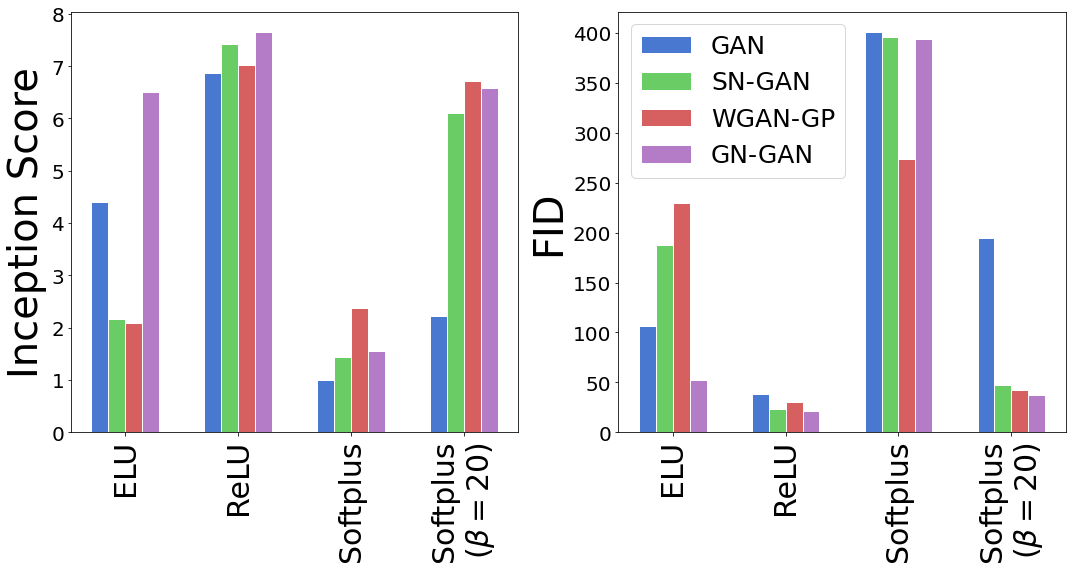

In [2]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

os.makedirs('./figures', exist_ok=True)
for i, score in enumerate(['Inception Score', 'FID']):
    for j, dataset in enumerate(['CIFAR-10']):
        cnt = i * 1 + j
        ax = axs.flat[cnt]
        r = np.arange(len(activations))
        for k, method in enumerate(['GAN', 'SN-GAN', 'WGAN-GP', 'GN-GAN']):
            ax.bar(r, scores[dataset][score][method], width=barWidth, edgecolor='white', label=method)
            r = [x + barWidth for x in r]
        tick_center = [x + barWidth * ((k + 1) // 2 - 0.5) for x in np.arange(len(activations))]
#         ax.set_yticklabels(np.arange(9), fontsize=fontsize)
        ax.set_xticks(tick_center)
        ax.set_xticklabels(activations, fontsize=fontsize, rotation=90)
#         ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
        ax.set_ylabel(score, fontsize=fontsize+10)
#         ax.set_title(dataset, y=-0.3, fontsize=fontsize)
        if cnt == 1:
            ax.legend(fontsize=legend_fontsize)
fig.tight_layout()
fig.savefig('./figures/vis_ablation_activation_cifar10.png')

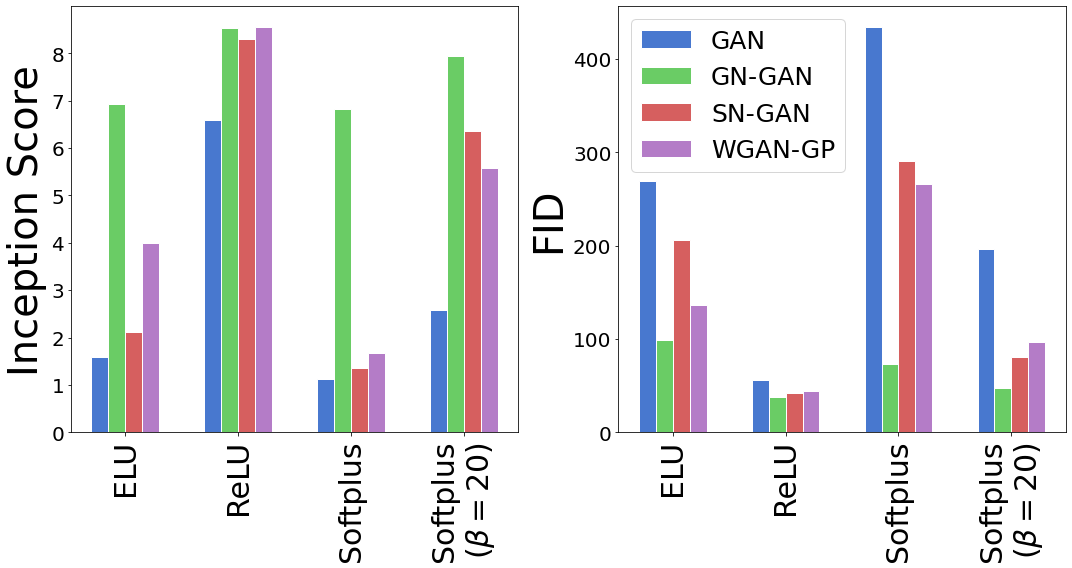

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

os.makedirs('./figures', exist_ok=True)
for i, score in enumerate(['Inception Score', 'FID']):
    for j, dataset in enumerate(['STL-10']):
        cnt = i * 1 + j
        ax = axs.flat[cnt]
        r = np.arange(len(activations))
        for k, method in enumerate(['GAN', 'GN-GAN', 'SN-GAN', 'WGAN-GP']):
            ax.bar(r, scores[dataset][score][method], width=barWidth, edgecolor='white', label=method)
            r = [x + barWidth for x in r]
        tick_center = [x + barWidth * ((k + 1) // 2 - 0.5) for x in np.arange(len(activations))]
#         ax.set_yticklabels(np.arange(9), fontsize=fontsize)
        ax.set_xticks(tick_center)
        ax.set_xticklabels(activations, fontsize=fontsize, rotation=90)
#         ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)
        ax.set_ylabel(score, fontsize=fontsize+10)
#         ax.set_title(dataset, y=-0.3, fontsize=fontsize)
        if cnt == 1:
            ax.legend(fontsize=legend_fontsize)
fig.tight_layout()
fig.savefig('./figures/vis_ablation_activation_stl10.png')